In [233]:
import numpy as np
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
#from sklearn.cross_validation import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

In [234]:
X = np.linspace(1,100,100)
ep = np.random.rand(100)*2
y = np.log(X)+ep

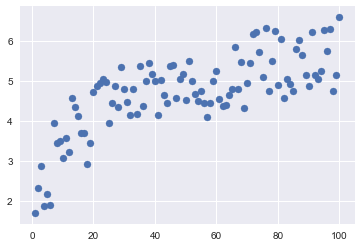

In [235]:
plt.scatter(X,y)

In [236]:
df = pd.DataFrame(X,columns=['X'])
df['X^2'] = df['X']**2
df.head()

,X,X^2
0,1.0,1.0
1,2.0,4.0
2,3.0,9.0
3,4.0,16.0
4,5.0,25.0


In [237]:
lm=LinearRegression()
lm.fit(df[['X^2']],y)
y_pred=lm.predict(df[['X^2']])
print(r2_score(y,y_pred))

0.4112893512854321


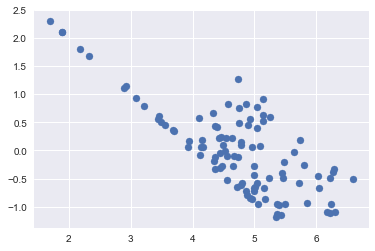

In [238]:
plt.scatter(y,y_pred-y)

In [239]:
df['log(X)'] = np.log(df['X'])
df.head()

,X,X^2,log(X)
0,1.0,1.0,0.000000
1,2.0,4.0,0.693147
2,3.0,9.0,1.098612
3,4.0,16.0,1.386294
4,5.0,25.0,1.609438


In [240]:
lm2=LinearRegression()
lm2.fit(df[['log(X)']],y)
y_pred2=lm2.predict(df[['log(X)']])
print(r2_score(y,y_pred2))

0.681759929640835


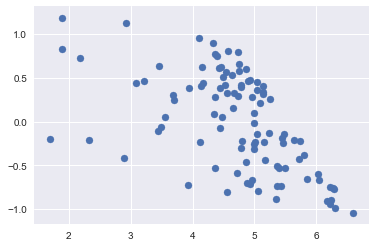

In [241]:
plt.scatter(y,y_pred2-y)

# Challenge 2

In [242]:
X2 = np.linspace(1,100,100)
ep2 = np.random.rand(100)*1000
y2 = .5*X2+1*X2**2+ep2

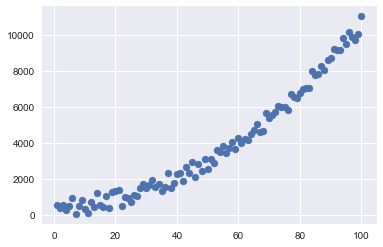

In [243]:
plt.scatter(X2,y2)

In [244]:
df2 = pd.DataFrame(X2,columns=['X']) 
df2['X^2'] = df2['X']**2
df2.head()

,X,X^2
0,1.0,1.0
1,2.0,4.0
2,3.0,9.0
3,4.0,16.0
4,5.0,25.0


In [245]:
X_train, X_test, y_train, y_test = train_test_split(df2, y2, test_size=0.2,random_state=42)

In [246]:
lm3=LinearRegression()
lm3.fit(X_train,y_train)
y_pred3=lm3.predict(X_test)
y_train3=lm3.predict(X_train)
train_error=mean_squared_error(y_train, y_train3)
test_error=mean_squared_error(y_test, y_pred3)
print(train_error,test_error)

79423.83688731077 92457.75629680762


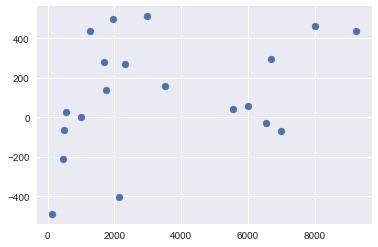

In [247]:
plt.scatter(y_test,y_test-y_pred3)

# Challenge 3

In [248]:
training_errors=[]
test_errors=[]
r_2s = []
aics = []
for i in range(1,8):
    interactions = PolynomialFeatures(degree=i)
    
    X_interactions = interactions.fit_transform(X_train)
    X_inter_test=interactions.fit_transform(X_test)
    
    m=LinearRegression()
    m.fit(X_interactions,y_train)
    
    y_preds_train=m.predict(X_interactions)
    y_preds=m.predict(X_inter_test)
    
    train_score=mean_squared_error(y_train, y_preds_train)
    test_score=mean_squared_error(y_test, y_preds)
    
    training_errors.append(train_score)
    test_errors.append(test_score)
    r_2s.append(r2_score(y_preds,y_test))
    

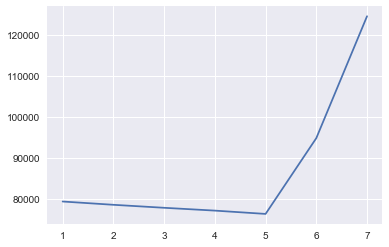

In [249]:
plt.plot(range(1,8),training_errors)

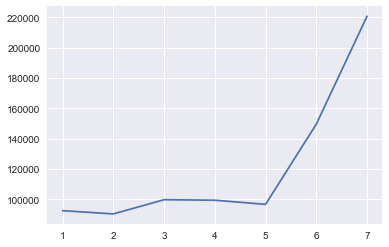

In [250]:
plt.plot(range(1,8),test_errors)

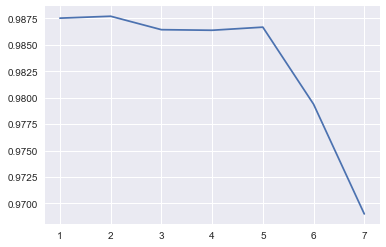

In [251]:
plt.plot(range(1,8),r_2s)

# Challenge 4

In [254]:
train_errs=[]
test_errs=[]

for i in range(int(len(X2)/5)):
    lm5=LinearRegression()
    lm5.fit(df2.iloc[0:(i+1)*5],y2[0:(i+1)*5])
    
    y_preds_train=lm5.predict(X_train)
    y_preds=lm5.predict(X_test)
    
    trainz=mean_squared_error(y_train, y_preds_train)
    testz=mean_squared_error(y_test, y_preds)
    
    train_errs.append(trainz)
    test_errs.append(testz)
    

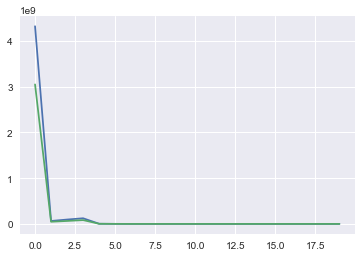

In [256]:
plt.plot(range(20),train_errs)
plt.plot(range(20),test_errs)